# Maximum Likelihood Method



Lets start with a simple Gaussian distribution. 

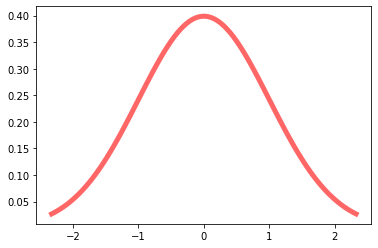

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

We can retrieve the probability of events happening, e.g. x=3.0

In [ ]:
p_3 = norm.pdf(3.0, 5.0, 3.0)

We can also easily calculate the joint probability of iid (indepenent and identically distributed) events 

In [ ]:
p_7 = norm.pdf(7.0, 7.0, 3.0)

joint = p_3*p_7

Assume now that someone is giving us an array of values and ask us to estimate a $p_{model}$ that is a 'good fit' to the gievn data. How we can go about solving this problem with Maximum Likelihood Estimation (MLE)? Notice that as addressed in [3], probability and likelihood have a reverse relationship.  Probability attaches to possible results; likelihood attaches to hypotheses. The likelihood function gives the relative likelihoods of different values for the parameter(s) of the distribution from which the data are assumed to have been drawn, given those data.

Lets plot a couple of $p_{model}$ hypotheses - the data are shown below in the same plot. Both hypotheses are plausible.  

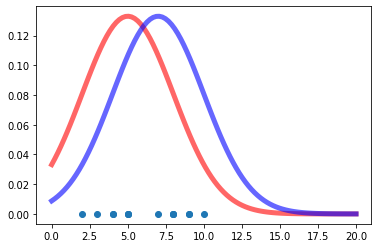

In [ ]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 20, 100)
ax.plot(x, norm.pdf(x,5,3),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.pdf(x,7,3),
       'b-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(data, np.zeros(len(data)).tolist(),'o')

As detailed in Ref [2], its important to safeguard against underflow that may well result from multiplying many numbers (for large datasets) that are less than 1.0 (probabilities). So we do the calculations in the log domain using the identity

$$log(a \times b)=log(a) + log(b)$$

Lets look at a function that calculates the log-likelihood for the two hypotheses above given the data denoted by $x$. 

In [ ]:
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))


We can readily compate the two hypotheses according to the maximum likelihood criterion. Note that because the $log$ is a monotonic function, the conclusion as to which hypothesis makes the data more likely is the same in the natural or the $log$ domain. 

In [ ]:
ll_comparison = compare_data_to_dist(data)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


It seems that the second hypothesis 

$$p_{model}(x|\mathbf{w}) = N(x | [\mu_2, \sigma_2^2])$$

is preferred compared to the first. 

We can now start searching the hypothesis space (parameter space) for the best parameter set $\mathbf w$. 

The max LL for sd 0.50 is 167.88
The max LL for sd 1.50 is 36.84
The max LL for sd 2.50 is 32.28
The max LL for sd 3.50 is 33.77
The max LL for sd 4.50 is 35.96


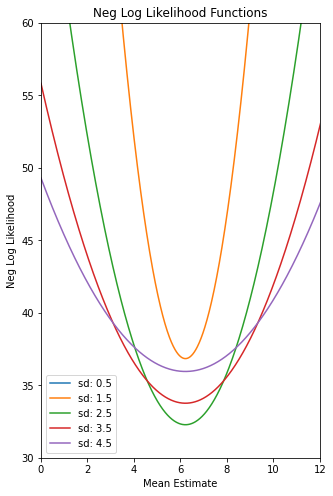

In [ ]:
# Plot the Negative Log Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Neg Log Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Neg Log Likelihood")
    plt.ylim(30, 60)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1.5, 2.5, 3.5, 4.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(-temp_mm) # negative LL
        
            if (max_val is None):
                max_val = min(ll_array)
            elif max(ll_array) > max_val:
                max_val = min(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
        print("The max LL for sd %.2f is %.2f" % (i, min(ll_array)))    
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')
plot_ll(data);


But there is a better method than exhaustively searching in the parameter space. We developed a method that incrementally minimizes a loss function that is ultimately linked to the concept of entropy - the cross entropy (CE) that for the supervided learning problem as shown in the notes has a lot to do with minimizing the KL divergence - a type of probabilistic 'distance' between $\hat p_{data}$ and $p_{model}$. 

This method is the Stochastic Gradient Descent. Can ypu estimate the hypothesis for the `data` array above? 

initialize mean and standard deviation with random value; calculate gradient of mean and standard deviation;
adjust mean and standard deviation using learning rate;
repeat steps 2 and 3 for n number of iterations
Gradient descent algorithm is converged faster as it runs on a sample instead of full data


In [ ]:
import random 

data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

mu = sum(data) / len(data) 
ran_mu = random.choice(data)
ran_sd = random.choice(data)
#choice() is an inbuilt function in Python programming language that returns a random item from a list, tuple, or string.

print("Original mu:",ran_mu,"Original sd:",ran_sd)

def compare_data_to_dist(x, mu_1, sd_1,learning_rate,num_iters):
    ll_1 = 0
    mu_gradient=0
    sd_gradient=0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        mu_gradient+=i
        sd_gradient+=(i-mu)**2
    print(sd_gradient)
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    mu_gradient=mu_gradient/len(data)
    sd_gradient=sd_gradient/len(data)
    mu_1 = mu_1 - learning_rate*mu_gradient
    sd_1 = sd_1 - learning_rate*sd_gradient

 
    for i in range(num_iters):
        num_iters=num_iters - 1
        compare_data_to_dist(data,mu_1,sd_1,0.2,num_iters)
        break

compare_data_to_dist(data, mu_1 = 8, sd_1 = 5, learning_rate= 0.1, num_iters = 10)


Original mu: 5 Original sd: 3
82.35714285714285
The LL of of x for mu = 8 and sd = 5 is: -37.9373
82.35714285714285
The LL of of x for mu = 7 and sd = 4 is: -36.2481
82.35714285714285
The LL of of x for mu = 6 and sd = 3 is: -33.2409
82.35714285714285
The LL of of x for mu = 4 and sd = 2 is: -35.5743
82.35714285714285
The LL of of x for mu = 3 and sd = 0 is: -123.1761
82.35714285714285
The LL of of x for mu = 2 and sd = 0 is: nan
82.35714285714285
The LL of of x for mu = 1 and sd = -1 is: nan
82.35714285714285
The LL of of x for mu = 0 and sd = -2 is: nan
82.35714285714285
The LL of of x for mu = -1 and sd = -3 is: nan
82.35714285714285
The LL of of x for mu = -2 and sd = -5 is: nan
82.35714285714285
The LL of of x for mu = -3 and sd = -6 is: nan


[[ 1.  8.]
 [ 1. 16.]
 [ 1. 22.]
 [ 1. 33.]
 [ 1. 50.]
 [ 1. 51.]]
[[-1.77921923 -1.34975252]
 [-1.77921923 -0.85893342]
 [-1.77921923 -0.4908191 ]
 [-1.77921923  0.18405716]
 [-1.77921923  1.22704775]
 [-1.77921923  1.28840013]]
[[-1.32075979]
 [-0.47772163]
 [-0.81493689]
 [ 0.1967089 ]
 [ 0.75873435]
 [ 1.65797506]]
w_MLE =  [[5.55111512e-17]
 [9.49393460e-01]]
Initial w =  [[ 0.49671415]
 [-0.1382643 ]]


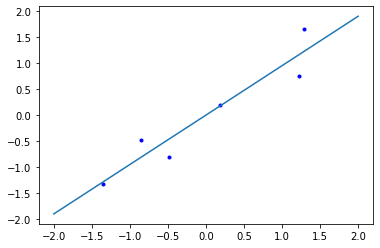

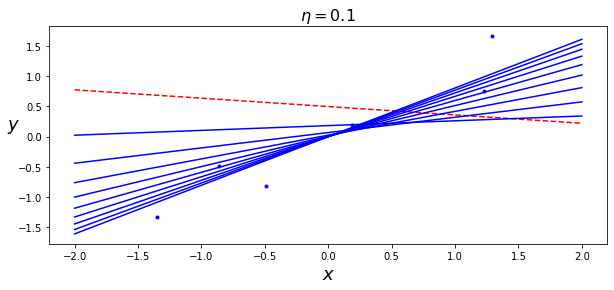

In [ ]:
# we always talk about vector notation as (mx1) in ML
x = np.array([[8, 16, 22, 33, 50, 51]]).T
y = np.array([[5, 20, 14, 32, 42, 58]]).T
from sklearn import preprocessing
scaler_x = preprocessing.StandardScaler().fit(x)
scaler_y = preprocessing.StandardScaler().fit(y)
m = len(x)
X_b = np.c_[np.ones((m, 1)), x]
print(X_b)
X_b = scaler_x.transform(X_b)
print(X_b)
y = scaler_y.transform(y)
print(y)
# MLE estimate (closed formula is possible for tiny datasets)
w_MLE = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('w_MLE = ', w_MLE)
plt.plot(X_b[:,1], y, "b.")
X_new = np.array([[-2], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(w_MLE)
plt.plot(X_new, y_predict) # PREDICTION USING CLOSED FORM EQUATION

def plot_gradient_descent(w, eta, w_path=None):
    m = len(X_b)
    plt.plot(X_b[:,1], y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradient = 2/m*X_b.T.dot(X_b.dot(w)-y)
        w = w - eta * gradient
        if w_path is not None:
            w_path.append(w)
    plt.xlabel("$x$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42) #why?
w = np.random.randn(2,1)  # random initialization
print('Initial w = ', w)
w_path_bgd = []
plt.figure(figsize=(10,4)) 
plot_gradient_descent(w, eta=0.1)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

1.	For gradient decent we calculate gradient for entire sample at each gradient decent step i.e. it is using the whole batch of training data at every step. As a result it is very slow for large datasets, whereas stochastic gradient decent picks a random data in the training set at every step and compute the gradient decent based on only that single instance, So SGD algorithm is much faster.
It doesn’t make much difference in given data set as it is very small. It can converge in small no. of iterations.
First, we have calculated the weights using closed form equation and then calculated using stochastic gradient descent. The closed form equation is computationally expensive if the sample size is large compared to gradient descent.
Weights from stochastic gradient descent: 0.496, -0.138


Initial w =  [[ 0.49671415]
 [-0.1382643 ]]


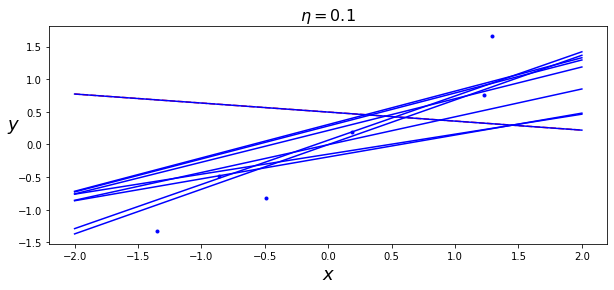

In [ ]:
# stocastic gradient descent
def plot_gradient_descent(w, eta, w_path=None):
    m = len(X_b)
    plt.plot(X_b[:,1], y, "b.")
    n_iterations = 1000 # no. of iterations
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            random_index=np.random.randint(m) 
            xi=X_b[random_index:random_index+1] #select a random x
            yi=y[random_index:random_index+1]  # select random y
        gradient = 2*xi.T.dot(xi.dot(w)-yi) # Gradient for stochastic
        w = w - eta * gradient
        if w_path is not None:
            w_path.append(w)
    plt.xlabel("$x$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42) #why?
w = np.random.randn(2,1)  # random initialization
print('Initial w = ', w)
w_path_bgd = []
plt.figure(figsize=(10,4)) 
plot_gradient_descent(w, eta=0.1)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# References

1. https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030
2. [Section 4.1 - Numerical computation](https://www.deeplearningbook.org/contents/numerical.html)
3. [Bayes for beginners - probability and likelihood](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) 